In [1]:
#εγκατάσταση πακέτου PyOD (https://pyod.readthedocs.io/en/latest/)
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=6a6db3a4b7112d45aa65af8724458d0b81bc87618973e2677ab20c5c2131c49f
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [2]:
' Flow Duration', ' Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', 'Fwd IAT Mean', 'Bwd IAT Mean', 'Active Mean', 'Idle Mean'

(' Flow Duration',
 ' Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 'Fwd IAT Mean',
 'Bwd IAT Mean',
 'Active Mean',
 'Idle Mean')

In [3]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pyod.models.ecod import ECOD
import matplotlib.pyplot as plt

In [4]:
#εισαγωγή του συνόλου δεδομένων
network_data = pd.read_csv('https://raw.githubusercontent.com/GCharisop/PRACTICAL-EXPERIMENT/main/DarkNet%20(1).csv', delimiter=',') # Use 'raw.githubusercontent.com' in the URL to access the raw data

<ipython-input-4-b8b7a85522e8>:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  network_data = pd.read_csv('https://raw.githubusercontent.com/GCharisop/PRACTICAL-EXPERIMENT/main/DarkNet%20(1).csv', delimiter=',') # Use 'raw.githubusercontent.com' in the URL to access the raw data


In [ ]:
' Flow Duration', ' Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', 'Fwd IAT Mean', 'Bwd IAT Mean', 'Active Mean', 'Idle Mean'

(' Flow Duration',
 ' Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 'Fwd IAT Mean',
 'Bwd IAT Mean',
 'Active Mean',
 'Idle Mean')

In [5]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pyod.models.ecod import ECOD
import matplotlib.pyplot as plt

In [6]:
#εισαγωγή του συνόλου δεδομένων
network_data = pd.read_csv('https://raw.githubusercontent.com/GCharisop/PRACTICAL-EXPERIMENT/main/DarkNet%20(1).csv', delimiter=',') # Use 'raw.githubusercontent.com' in the URL to access the raw data

<ipython-input-6-b8b7a85522e8>:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  network_data = pd.read_csv('https://raw.githubusercontent.com/GCharisop/PRACTICAL-EXPERIMENT/main/DarkNet%20(1).csv', delimiter=',') # Use 'raw.githubusercontent.com' in the URL to access the raw data


In [7]:
print(network_data.columns)

Index(['Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol', 'Flow_Duration',
       'Total_Fwd_Packet', 'Total_Bwd_packets', 'Total_Length_of_Fwd_Packet',
       'Total_Length_of_Bwd_Packet', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes/s', 'Flow_Packets/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s',
       'Packet_Length_Min', 'Packet_Length_Max', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag

In [8]:
# Function to standardize column names (remove leading/trailing spaces and convert to lowercase)
def standardize_column_name(column):
  return column.strip().lower()

# Apply the function to the DataFrame's columns
network_data.columns = [standardize_column_name(col) for col in network_data.columns]


In [9]:
# Ensure the features list has standardized names
features = ['Flow_Bytes/s', 'Flow_Packets/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min']

In [10]:
# Ensure the features list has standardized names
features = ['flow_bytes/s', 'flow_packets/s',
       'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
       'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
       'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std',
       'bwd_iat_max', 'bwd_iat_min']

# Select features for analysis
X = network_data[features]

In [11]:
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np # Added import statement for NumPy

In [13]:
# Replace '?' with NaN in the DataFrame
X.replace('?', np.nan, inplace=True)


<ipython-input-13-64bb595a9738>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('?', np.nan, inplace=True)


In [14]:
# Convert columns to numeric type, handling errors by coercing to NaN
for col in X.columns:
  X[col] = pd.to_numeric(X[col], errors='coerce')

<ipython-input-14-22622e4d4d2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors='coerce')


In [15]:
# Check for infinite values and replace them with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Assuming 'X' is your feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<ipython-input-15-fbf7187bee83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


In [16]:
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming 'X' is your feature data
# Replace '?' with NaN in the DataFrame
X.replace('?', np.nan, inplace=True)

<ipython-input-16-0f53635ce500>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('?', np.nan, inplace=True)


In [17]:
# Convert columns to numeric type, handling errors by coercing to NaN
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

<ipython-input-17-1732b156c864>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors='coerce')


In [18]:
# Check for infinite values and replace them with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean') # Create an imputer object with the mean strategy
X_imputed = imputer.fit_transform(X) # Fit and transform the imputer on your data

# Scale the imputed data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


<ipython-input-18-f7c27da90514>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


In [19]:
from sklearn.ensemble import IsolationForest

# Create an IsolationForest model
model = IsolationForest()

# Fit the model and predict anomaly scores
anomaly_scores = model.fit_predict(X_scaled)

# Add the anomaly scores to your DataFrame
network_data['anomaly_score'] = anomaly_scores

In [20]:
threshold = np.percentile(anomaly_scores, 100 * 0.1)

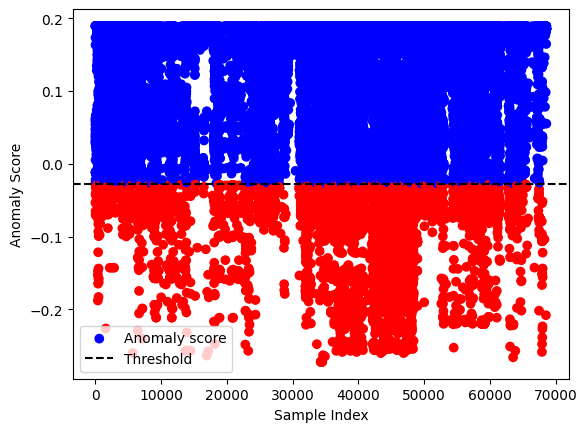

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Χρησιμοποιήστε decision_function για να πάρετε τα σκορ ανωμαλιών
anomaly_scores = model.decision_function(X_scaled)

# Καθορίστε το κατώφλι ανωμαλιών (εδώ, το 10% των χαμηλότερων scores)
anomaly_threshold = np.percentile(anomaly_scores, 100 * 0.1)

# Δημιουργία λίστας χρωμάτων με βάση το κατώφλι
colors = ['blue' if score >= anomaly_threshold else 'red' for score in anomaly_scores]

# Δημιουργία διαγράμματος διασποράς
plt.scatter(network_data.index, anomaly_scores, c=colors, label='Anomaly score')
plt.axhline(y=anomaly_threshold, color='black', linestyle='--', label='Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Anomaly Score')
plt.legend()
plt.show()

In [22]:
# Add the anomaly scores to your DataFrame
network_data['anomaly_score'] = anomaly_scores

In [24]:
# Δημιουργία DataFrame για τα δείγματα που έχουν χαρακτηριστεί ως ανωμαλίες
anomalies = network_data[anomaly_scores < anomaly_threshold]

# Εκτύπωση των ανωμαλιών
print(anomalies)

              src_ip  src_port          dst_ip  dst_port  protocol  \
21     10.152.152.11     47874  173.194.65.102       443         6   
22     10.152.152.11     47698  173.194.65.101       443         6   
23     10.152.152.11     57457  173.194.65.138       443         6   
25     10.152.152.11     49132  74.125.136.120       443         6   
28     10.152.152.11     41995  74.125.136.132       443         6   
...              ...       ...             ...       ...       ...   
68023     10.8.8.246       138      10.8.8.247       138        17   
68029        8.6.0.1         0         8.0.6.4         0         0   
68032        8.6.0.1         0         8.0.6.4         0         0   
68296        8.6.0.1         0         8.0.6.4         0         0   
68508     10.8.8.246       138      10.8.8.247       138        17   

       flow_duration  total_fwd_packet  total_bwd_packets  \
21          59904266                 2                  4   
22          59650091                 